In [1]:
import seaborn as sns ## Visualization
import numpy as np ## Linear Algebra
import pandas as pd ## To work with data
import plotly.express as px ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visuaization
from plotly import tools ## Visualization
import os

In [4]:
df=pd.read_csv("C:/Users/MSC/Desktop/project/da/crop_production.csv")

In [5]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Data Cleaning

In [6]:
df.shape

(246091, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


We have 4 categorical attributes, namely State_Name, District_Name, Season, Crop. The other 3 attributes are numericals values with Area in hectare and Production in tonnes.

In [8]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
df.Production.isnull().sum()/df.shape[0]

0.015156994770227274

The Production attribute has 3730 missing values which contributes to just 1.51% of the entire dataset. Hence, we can drop these samples.

In [10]:
df.dropna(subset=["Production"],axis=0,inplace=True)
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# Checking for any correlation between the numerical attributes.

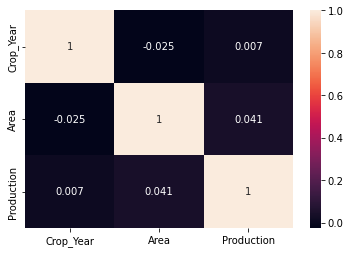

In [11]:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True);

There is no considerable correlation between any of the attributes in the dataset.

# Individual Attribute Analysis

## State_Name

In [12]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [13]:
df.State_Name.nunique()

33

In [14]:
df.State_Name.value_counts().head(10)

Uttar Pradesh     33189
Madhya Pradesh    22604
Karnataka         21079
Bihar             18874
Assam             14622
Odisha            13524
Tamil Nadu        13266
Maharashtra       12496
Rajasthan         12066
Chhattisgarh      10368
Name: State_Name, dtype: int64

This dataset encodes agriculture data for 33 Indian states (including Union Territories). As seen above, we have more data from states like Uttar Pradesh, Madhya Pradesh and Karnataka than the other states.

## District_Name

In [15]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [16]:
df.District_Name.nunique()

646

In [17]:
df.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

On District front, we have 646 districts with more data coming from Tumkur, Belgaum, Bijapur, Hassan and Bellary, from Karantaka.

## Crop_Year

In [18]:
df.Crop_Year.nunique()

19

In [19]:
print(df.Crop_Year.min())
print(df.Crop_Year.max())

1997
2015


The dataset contains agricultural information for 19 years from the year 1997 to 2015.

In [20]:
df.Crop_Year.value_counts()

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64

With most of the data records coming from the years 2002-2011.

## Season

In [21]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [22]:
df.Season.nunique()

6

In [23]:
df.Season.value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

Dataset talks about 6 different season crops with more data points including Kharif, Rabi and Annual Crops.

## Crop

In [24]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [25]:
df.Crop.nunique()

124

In [26]:
df.Crop.value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

The dataset shows data for 124 different crop varieties. We can see that the top crops are Rice,Maize and Moong(Green Gram).

## Area

In [27]:
df.Area.describe()

count    2.423610e+05
mean     1.216741e+04
std      5.085744e+04
min      1.000000e-01
25%      8.700000e+01
50%      6.030000e+02
75%      4.545000e+03
max      8.580100e+06
Name: Area, dtype: float64

In [28]:
df.Area.value_counts().head(10)

1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: Area, dtype: int64

Area under cultivation ranges from 0.1 hectare to 8580100 hectare, with an average area being 12167.41 hectare. A lot of the farmers having a cultivation land area of 1 to 10 hectare.

{'whiskers': [<matplotlib.lines.Line2D at 0x282b45248e0>,
 'caps': [<matplotlib.lines.Line2D at 0x282b4524e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x282b4524610>],
 'medians': [<matplotlib.lines.Line2D at 0x282b5588370>],
 'fliers': [<matplotlib.lines.Line2D at 0x282b5588640>],
 'means': []}

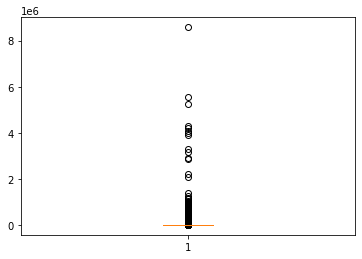

In [29]:
plt.boxplot(df.Area)

Looking at the distribution we can say that the attribute is highly skewed with quite a few outliers.

## Production

In [30]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

Production values range from 0 to 1250800000 tonnes, with an average production being 582503.4 tonnes.

{'whiskers': [<matplotlib.lines.Line2D at 0x282b55de7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x282b55ded60>,
 'boxes': [<matplotlib.lines.Line2D at 0x282b55de4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x282b55ee340>],
 'fliers': [<matplotlib.lines.Line2D at 0x282b55ee610>],
 'means': []}

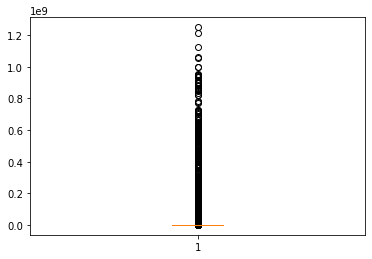

In [31]:
plt.boxplot(df.Production)

Looking at the distribution we can say that the attribute is highly skewed with quite a few outliers.

# EDA

## Overall Crop Production by State

In [32]:
temp = df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'State_Name', 'Production')

From above graph we can see that : 

*   Kerala is the highest crops producing state overall. It has produced more than 500% crop than the runner up state, Andhra Pradesh.
*   Top 3 crop producing states are from south India, which put together leave no space to compare rest states.

## Productivity by State

In [33]:
temp = df.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area', )

C:\Users\MSC\AppData\Local\Temp\ipykernel_17896\2421396015.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Above graph tells us that :

*   Kerala is the most productive state when we compare in terms of production by area.
*   We see Andaman and Nicobar islands, Puducherry, Goa and many other states which are low in overall production, have higher productivity when we compare with the crop areas.

## Overall Production through the years

In [34]:
temp = df.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production')

## Average Crop Area through the years

In [35]:
temp = df.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

In Above Graph we can see that :

*   Average Crop Area has decresed over the years.
*   We had the lowest Average Crop area in Years 2002 and 2003. (We have comparitively very less data of the year 2015 so, we will not consider that)

## Most and least crop producing Districts

In [36]:
fig = py.subplots.make_subplots(rows=1,cols=2,
                    subplot_titles=('Highest crop producing districts', 'Least overall crop producing districts'))

temp = df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()
trace1 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

temp1=temp.head()
trace2 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.show()

## Most Produced Crops

In [37]:
top_crop_pro = df.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


In [38]:
temp = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(), 'Crop', 'Production')

## EDA on Coconut

In [39]:
coc_df = df[df["Crop"]=="Coconut "]
print(coc_df.Season.unique())
print(coc_df.Season.value_counts())

['Whole Year ' 'Kharif     ']
Whole Year     1945
Kharif           13
Name: Season, dtype: int64


<AxesSubplot:xlabel='Season', ylabel='Production'>

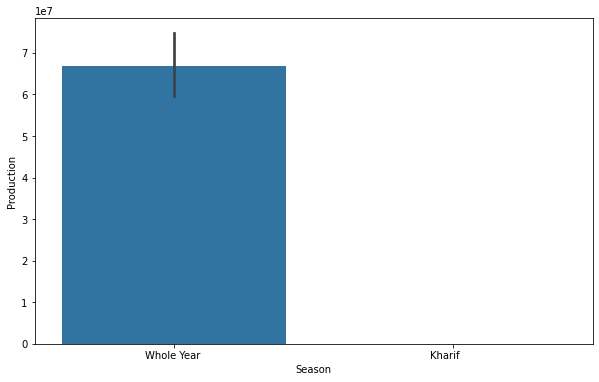

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x="Season",y="Production",data=coc_df)

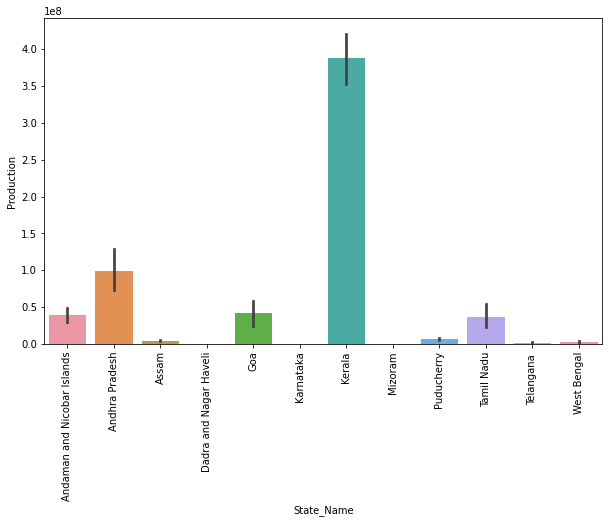

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x="State_Name",y="Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [42]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent of production"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent of production
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


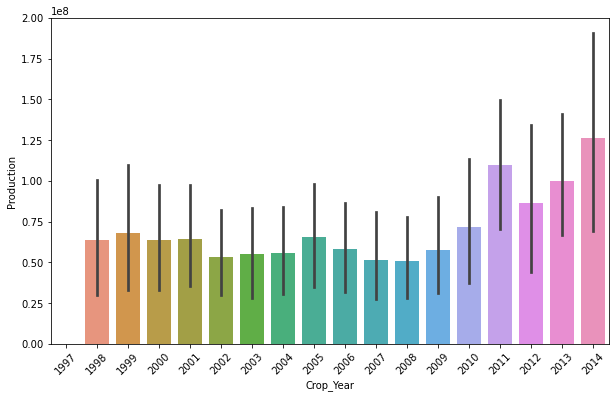

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x="Crop_Year",y="Production",data=coc_df)
plt.xticks(rotation=45)
plt.show()

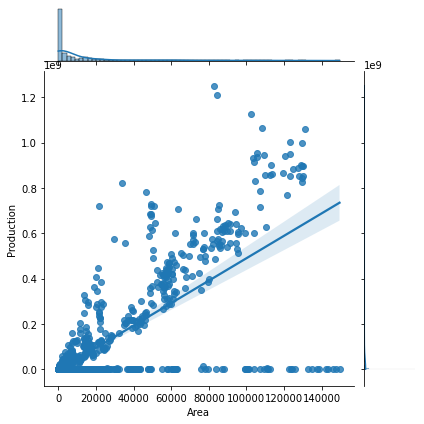

In [44]:
sns.jointplot(x="Area",y="Production",data=coc_df,kind="reg")

Insights from Coconut EDA:

*   Cocunut production is directly proportional to area.
*   Its production is also gradually increasing over a time of period.
*   Production is highest in Kerala.
*   It does not depends on the season.

## EDA on Sugarcane

In [45]:
sug_df = df[df["Crop"]=="Sugarcane"]
print(sug_df.Season.unique())
print(sug_df.Season.value_counts())

['Whole Year ' 'Autumn     ' 'Kharif     ' 'Rabi       ' 'Winter     '
 'Summer     ']
Whole Year     6203
Kharif         1159
Winter          444
Rabi             13
Autumn            6
Summer            2
Name: Season, dtype: int64


<AxesSubplot:xlabel='Season', ylabel='Production'>

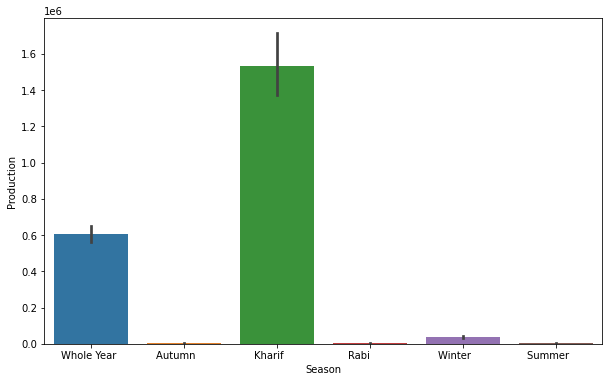

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x="Season",y="Production",data=sug_df)

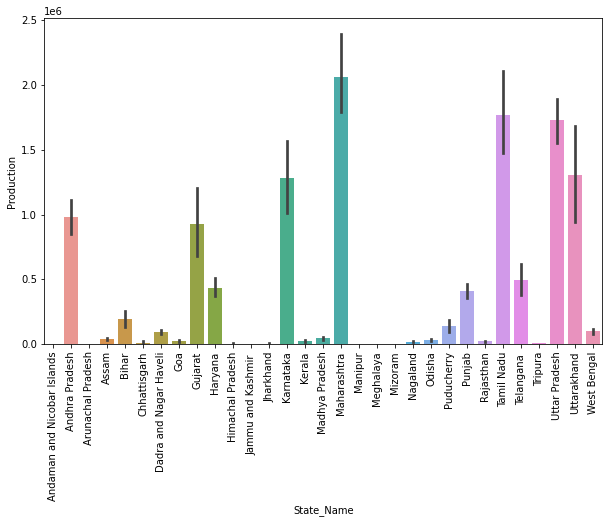

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x="State_Name",y="Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [48]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent of production"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent of production
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


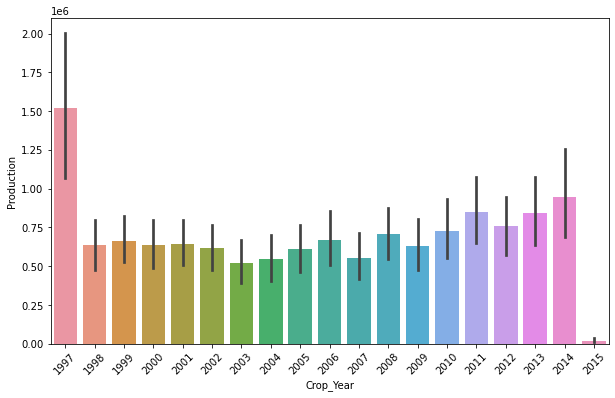

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x="Crop_Year",y="Production",data=sug_df)
plt.xticks(rotation=45)
plt.show()

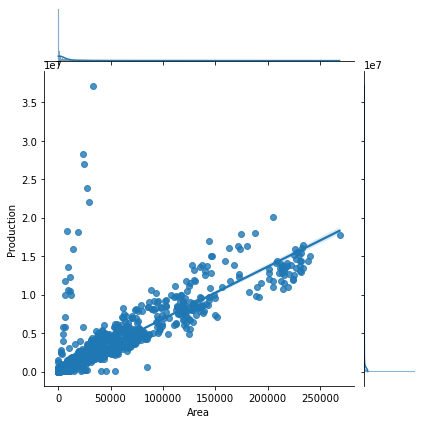

In [50]:
sns.jointplot(x="Area",y="Production",data=sug_df,kind="reg")

Insights from Sugarcane EDA:

*   Sugarecane production is directly proportional to area
*   It is produced in considerably high quantities in many states.

## EDA on Rice

In [51]:
rice_df = df[df["Crop"]=="Rice"]
print(rice_df.Season.unique())
print(rice_df.Season.value_counts())

['Kharif     ' 'Autumn     ' 'Rabi       ' 'Whole Year ' 'Summer     '
 'Winter     ']
Kharif         6864
Summer         2952
Winter         2254
Autumn         2088
Rabi            796
Whole Year      128
Name: Season, dtype: int64


<AxesSubplot:xlabel='Season', ylabel='Production'>

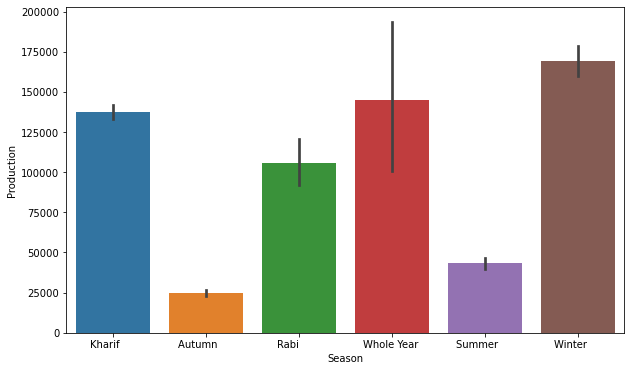

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x="Season",y="Production",data=rice_df)

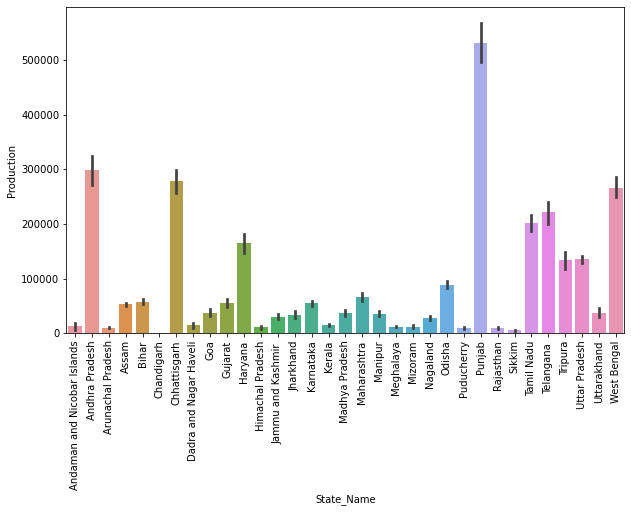

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x="State_Name",y="Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [54]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent of production"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent of production
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


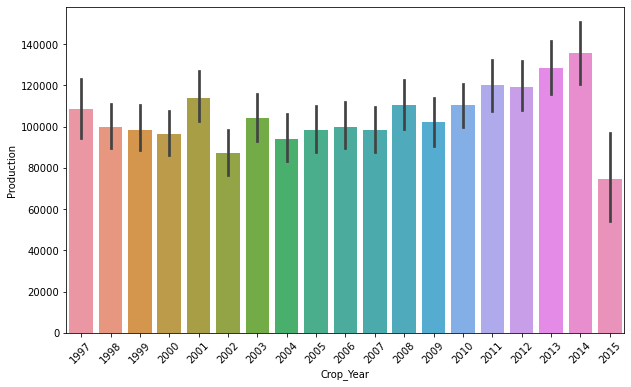

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x="Crop_Year",y="Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

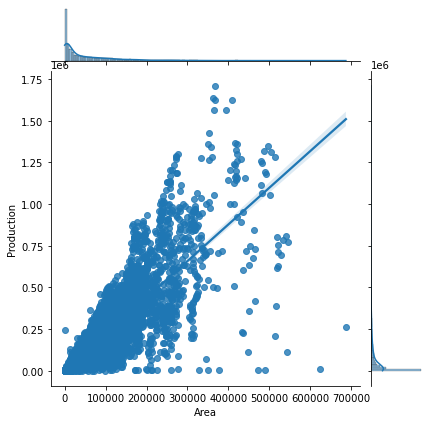

In [56]:
sns.jointplot(x="Area",y="Production",data=rice_df,kind="reg")

Insights:

*   Rice is produced throughout the year.
*   Production is directly proportional to Area.
*   India consistently producses a high quantity of Rice every year since 1997 ( since we have less data on 2015, there's a reduciton)
*   The higest Rice producing state is Punjab.



In [148]:
crop_data=pd.read_csv("Crop_recommendation.csv")
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [149]:
c=crop_data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
crop_data['target']=c.cat.codes

In [150]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   target       2200 non-null   int8   
dtypes: float64(4), int64(3), int8(1), object(1)
memory usage: 139.8+ KB


In [159]:
crop_data.rename(columns = {'label':'Crop' ,'N' : 'Nitrogen' , 'P' :'phosphorous' , 'K': 'potassium' }, inplace = True)
crop_data

,Nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall,Crop,target
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [158]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall,target
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [157]:
crop_data.isnull().values.any()

False

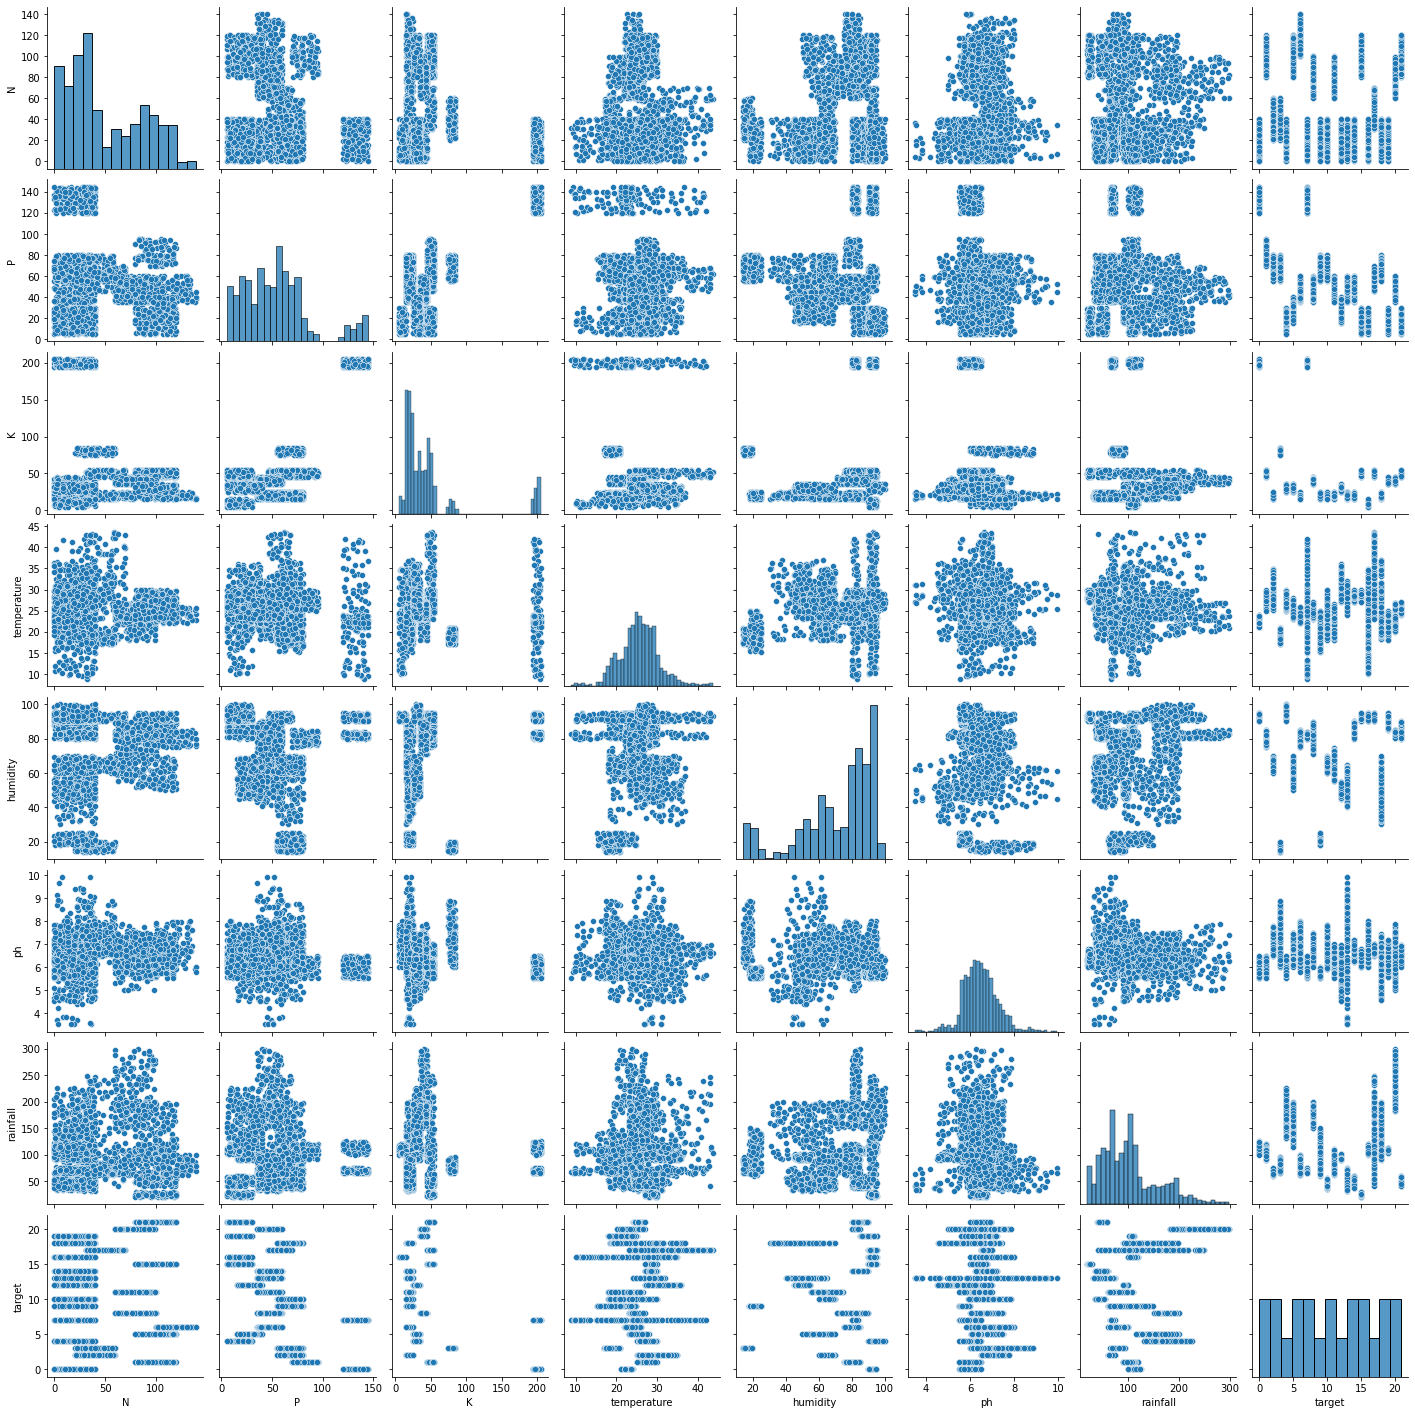

In [156]:
ax = sns.pairplot(crop_data)
ax

In [155]:
crop_data.corr()

,N,P,K,temperature,humidity,ph,rainfall,target
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
target,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

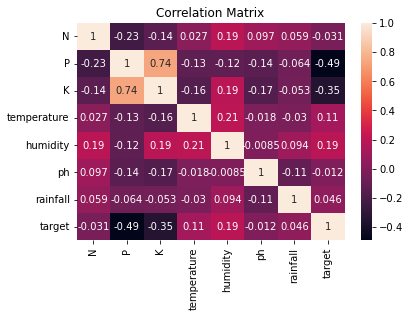

In [154]:
sns.heatmap(crop_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [160]:
# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df

,Nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall,Crop,target
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes,7
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon,15
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut,4
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea,3
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon,21
...,...,...,...,...,...,...,...,...,...
740,24,80,19,29.678925,69.085455,6.808042,65.664366,blackgram,2
1032,105,74,45,25.145176,81.382041,6.098369,119.218154,banana,1
2121,83,21,28,25.567483,60.492446,7.466901,190.225784,coffee,5
1424,102,25,50,28.204808,92.914404,6.099662,20.360011,muskmelon,15


In [173]:
y=crop_data.target
x=crop_data[['Nitrogen','phosphorous','potassium','temperature','humidity','ph','rainfall']]
targets

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [169]:
crop_list = crop_data['Crop'].value_counts().index.tolist()
print(crop_list)
len(crop_list)

['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana', 'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans', 'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee']


22

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1270,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1832,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1032,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [170]:
# Splitting data set - 25% test dataset and 75% 


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650,)
y_test : (550,)


In [171]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [174]:
# Training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [175]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
model.score(X_test,y_test)

0.9872727272727273

In [178]:
result = model.predict(x_test)

In [180]:
#calculating rmse values
import sklearn.metrics 
import math   
mse = sklearn.metrics.mean_squared_error(result , y_test)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 4.3707706830302095


In [181]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


clf = RandomForestClassifier(n_estimators = 100)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


from sklearn import metrics
print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.9963636363636363


In [182]:
result_2 = model.predict(X_test)

In [189]:
#calculating rmse values
import sklearn.metrics 
import math   
mse = sklearn.metrics.mean_squared_error(result_2, y_test)  
print(mse)
mse_2 = -mse
  
rmse_2 = math.sqrt(mse_2)  
  
print("The difference between actual and predicted values", rmse_2)  

-0.4636363636363636
The difference between actual and predicted values 0.6809084840390547


In [191]:
#k Neighbors classification
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [192]:
y_pred = classifier.predict(X_test)

In [193]:
from sklearn import metrics
print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9781818181818182


In [196]:
#calculating rmse values
import sklearn.metrics 
import math   
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)  
mse_3 = -mse
  
rmse_3 = math.sqrt(mse_3)  
  
print("The difference between actual and predicted values", rmse_3)  

The difference between actual and predicted values 0.4199567077254944


In [197]:
import pandas as pd
 
# initialise data of lists.
data = {'Algorithms':['Random Forest', 'Decision-tree', 'KNN Classifier'],
        'Accuracy':[a1, a2, a3],
        'rmse':[rmse,rmse_2,rmse_3]}
 

df = pd.DataFrame(data)

df

,Algorithms,Accuracy,rmse
0,Random Forest,0.980000,0.463636
1,Decision-tree,0.943636,0.680908
2,KNN Classifier,0.974545,0.419957


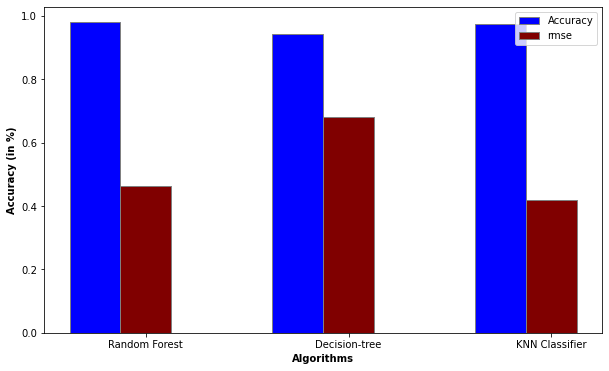

In [198]:
import numpy as np
import matplotlib.pyplot as plt
 

barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 

Algorithms = ['Random Forest', 'Decision-tree', 'KNN Classifier']
Accuracy = [a1, a2, a3]
rmse = [rmse,rmse_2,rmse_3]
 

br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 

plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, rmse, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='rmse')
 

plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)
 
plt.legend()
plt.show()